# Problem Set 3.

Submit by: Thursday Nov 3, 2022, 23:59

Please answer the problem set and submit the code to the corresponding github repository.

In [1]:
# Importing libraries 

import pandas as pd
from google.colab import files
import io
import numpy as np

In [2]:
# Load the dataset called adult-census.csv and save it as a Pandas DF called adult_census

uploaded = files.upload()
adult_census = pd.read_csv(io.BytesIO(uploaded['adult-census.csv']))

Saving adult-census.csv to adult-census.csv


In [3]:
# Printing dataset
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Question 1. What is the mean value of "age"?**

In [4]:
# Calculate the mean of "age" variable
mean_age = adult_census['age'].mean()

print(f'The mean age in the dataset is: ', round(mean_age, 2))

The mean age in the dataset is:  38.64


In [5]:
import numpy as np


In [6]:
adult_census.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Set "class" as your target variable y

Set only the numerical features (currently saved as either integers or floats) as X.


In [14]:
# Set X and y 

y = adult_census['class']
X = adult_census[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

#print(y)
print(X)

       age  education-num  capital-gain  capital-loss  hours-per-week
0       25              7             0             0              40
1       38              9             0             0              50
2       28             12             0             0              40
3       44             10          7688             0              40
4       18             10             0             0              30
...    ...            ...           ...           ...             ...
48837   27             12             0             0              38
48838   40              9             0             0              40
48839   58              9             0             0              40
48840   22              9             0             0              20
48841   52              9         15024             0              40

[48842 rows x 5 columns]


**Question 2. What is the standard deviation of the variable "capital-gain" in X?**


In [8]:
# Calculate the s.d. of "capital-gain"

std_capital_gain = adult_census['capital-gain'].std()
print(f'The standard deviation of capital-gain is: ', round(std_capital_gain, 2))

The standard deviation of capital-gain is:  7452.02


"Education-num" is not going to be used in this model. Remove the "education-num" variable from X.

In [17]:
# Remove "education-num" variable from the X data you set above

X.drop(['education-num'], axis = 1, inplace = True)


KeyError: ignored

In [18]:
print(X)

       age  capital-gain  capital-loss  hours-per-week
0       25             0             0              40
1       38             0             0              50
2       28             0             0              40
3       44          7688             0              40
4       18             0             0              30
...    ...           ...           ...             ...
48837   27             0             0              38
48838   40             0             0              40
48839   58             0             0              40
48840   22             0             0              20
48841   52         15024             0              40

[48842 rows x 4 columns]


**Question 3. How many numerical features are present in X now?**

In [19]:
# Write your code here
X.dtypes

age               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

**Question 4. What is the most frequent feature in y?**

In [20]:
# Write your code here
num = y[0]

def most_frequent(y):
    counter = 0
     
    for i in y:
        curr_frequency = y.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num
print(num)

 <=50K


Using the X that only contained the numerical variables without education-num, and the previously set y:

Compare the generalization performace using the accuracy of the two following predictive models (no training and testing set necessary):


*   A linear model composed of StandardScaler and a LogisticRegression
*   A DummyClassifier predicting the most frequent class



In [28]:
# Import the models and fit the using X and y (For this problem set you do not have to 
# use training and testing sets)

# Linear Model using Standard Scaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipe = Pipeline ([
    ('scale', StandardScaler()),
    ('model', LogisticRegression())
])

classifier = LogisticRegression()
classifier.fit(X, y)
pred = pipe.fit(X, y).predict(X)

# Evaluate
acc = accuracy_score(y, pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.800



**Question 5. By comparing test scores of both models, which classifier did better?**

In [23]:
# Obtain the scores of both models
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X, y)
print(f"Accuracy of the dummy classifier: "
      f"{dummy_classifier.score(X, y):.3f}")

Accuracy of the dummy classifier: 0.761


In [27]:
print("Based on the previous results the best model, the one who scored better, is the Logistic Regression.")

Based on the previous results, the best model, the one who scored better, is the Logistic Regression


**Question 6. What is the value of the odds ratio of the "capital-loss" feature?**

In [29]:
# Acces the coeficients and calculate the odds
np.exp(classifier.coef_)

array([[1.0387455 , 1.00033005, 1.00076113, 1.04449529]])

Use a Confusion Matrix to evaluate the predictions with more granularity.


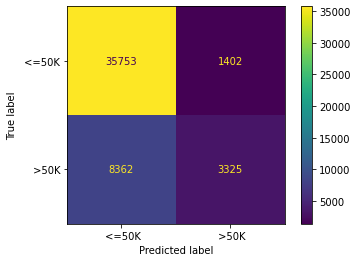

In [30]:
# Visualize a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, X, y)


**Question 7. Do you think accuracy is a good metric to evaluate this dataset? Justify your answer.**

In [31]:
print("We can see that accuracy is not the best metric to calculate the efficiency of this dataset. This happens because there is a very big imbalance in the data where the predicted datapoints tend to fall in the category of '<=50K'.")

We can see that accuracy is not the best metric to calculate the efficiency of this dataset. This happens because there is a very big imbalance in the data where the predicted datapoints tend to fall in the category of '<=50K'.
